In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def set_plot_config(small_size=10, medium_size=14, big_size=16, usetex=False):
    sns.set_context("paper", font_scale=0.75)
    sns.set_palette(sns.color_palette("bright", 8))
    sns.set_style('white')

    rc = {
        'xtick.major.size': 2,
        'xtick.major.width': 0.5,
        'ytick.major.size': 2,
        'ytick.major.width': 0.5,
        'xtick.bottom': True,
        'ytick.left': True,
        'font.size': medium_size,
        'axes.titlesize': medium_size,
        'axes.labelsize': medium_size,
        'xtick.labelsize': small_size,
        'ytick.labelsize': small_size,
        'legend.fontsize': small_size,
        'figure.titlesize': medium_size,
        'savefig.dpi': 300,
        'figure.dpi': 300,
        'text.usetex': usetex,
        "font.family": "serif",
        "font.serif": ["Liberation Serif", "DejaVu Serif", 
                       "Nimbus Roman No9 L", "Times"]
    }

    plt.rcParams.update(rc)
    
def enable_jupyter_inline_backend():
    """
    启用 Jupyter inline 后端显示图像，并设置 bbox_inches 参数。
    仅在 Jupyter 环境下有效。
    """
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            ipython.run_line_magic('matplotlib', 'inline')
            ipython.run_line_magic('config', "InlineBackend.print_figure_kwargs = {'bbox_inches': None}")
    except Exception as e:
        print("无法启用 Jupyter inline backend。错误信息: ", e)

In [15]:
set_plot_config()
enable_jupyter_inline_backend()

正在计算解析解温度场...
正在生成图像...


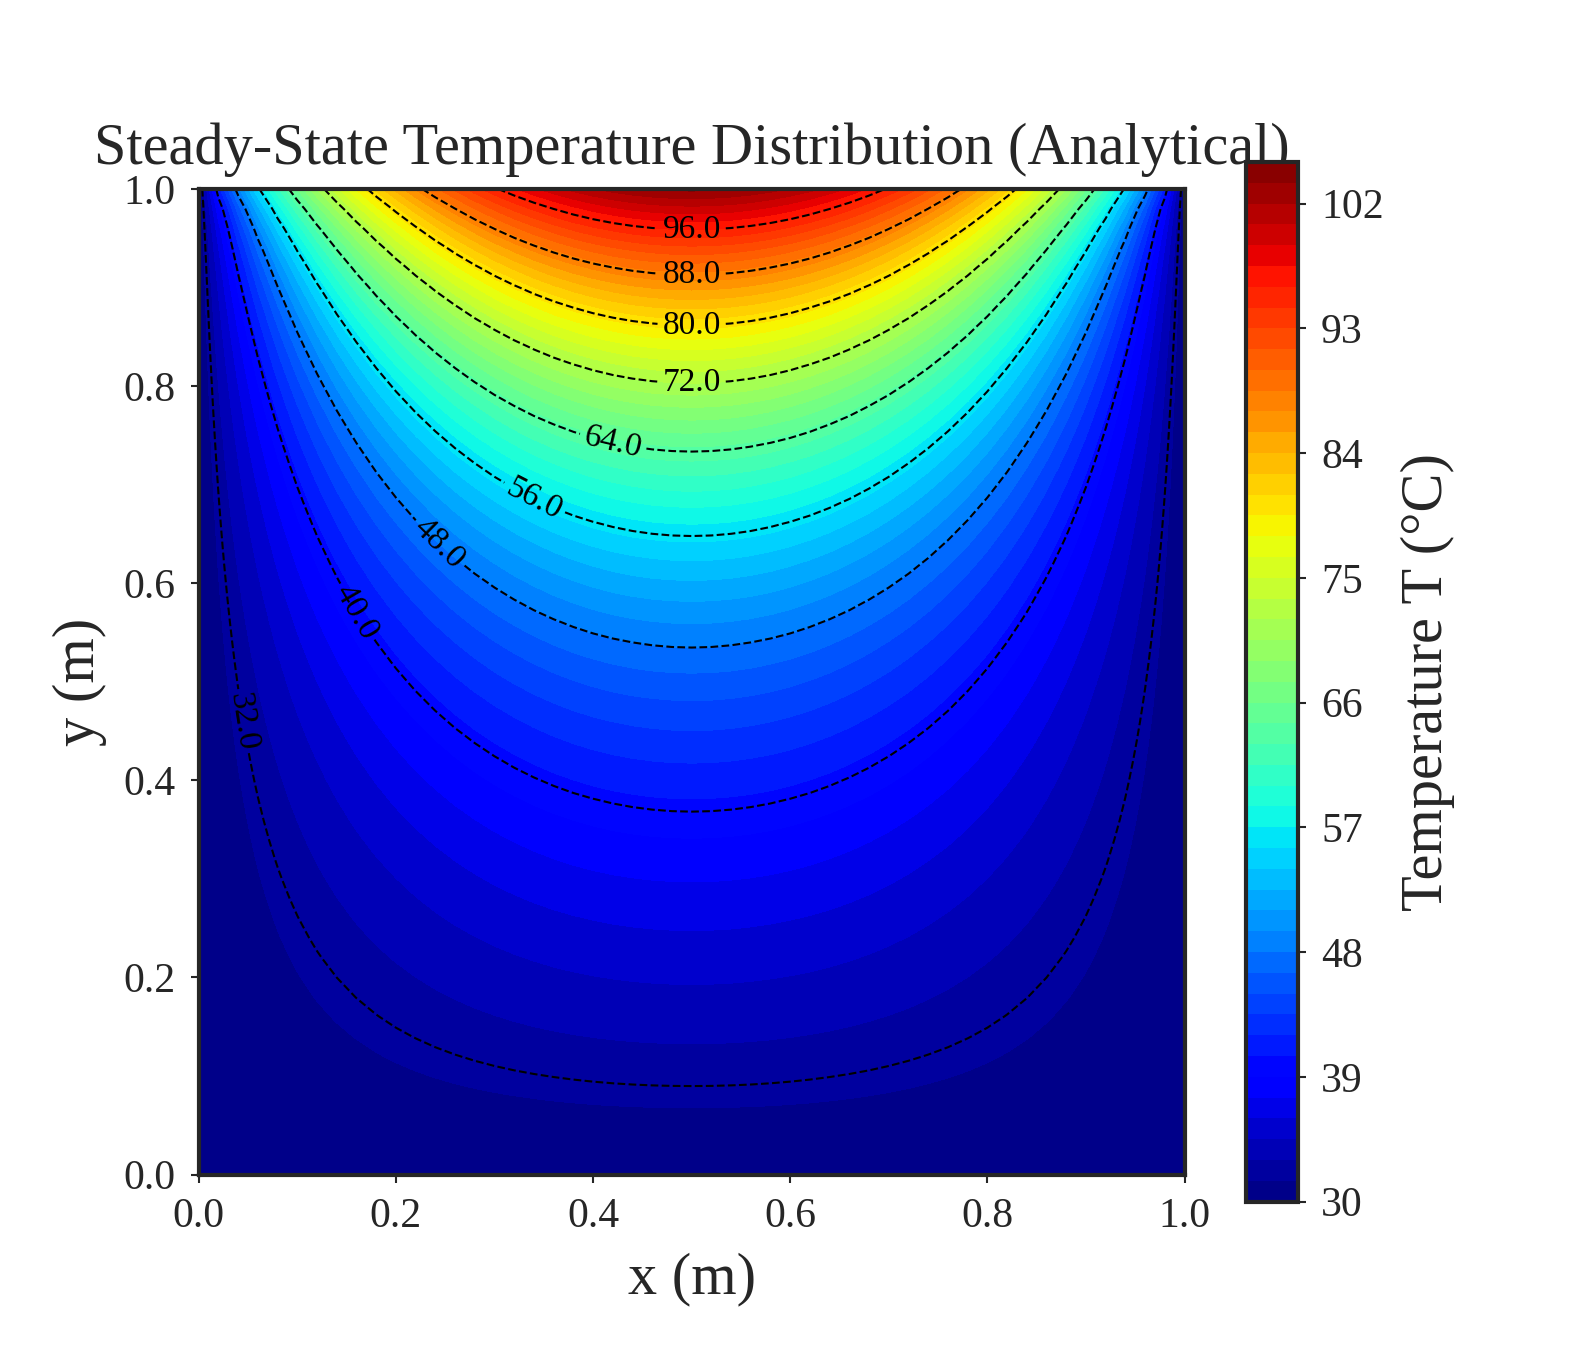

图像生成完毕。


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 定义物理参数 (来自作业) ---
L = 1.0         # 板的长度 (m)
W = 1.0         # 板的宽度 (m)
k = 10.0        # 热导率 (W/(m·K))
q_s_prime = 2000.0  # 热通量 (W/m^2)
T1 = 30.0       # 恒定边界温度 (°C)

# --- 2. 定义 (a) 部分的解析解函数 ---
def T_analytical(x, y, N_terms=50):
    """
    计算 (a) 部分推导的稳态温度解析解
    x 和 y 可以是 numpy 数组
    """
    # 初始温度为 T1
    T = np.full_like(x, T1)
    
    # 系数 (800 / pi^2)
    C = (4 * q_s_prime) / (k * np.pi**2)
    
    # 仅对奇数 n 求和 (n = 1, 3, 5, ..., 2*N_terms - 1)
    for n_odd in range(1, 2 * N_terms + 1, 2):
        # 预计算 n*pi
        n_pi = n_odd * np.pi
        
        # 计算级数的每一项
        # 注意: L=1, W=1
        term = (np.sin(n_pi * x) * np.sinh(n_pi * y)) / \
               (n_odd**2 * np.cosh(n_pi))
               
        T += C * term
    
    return T

# --- 3. 创建用于绘图的网格 ---
# 创建与FDM解相同分辨率的网格以确保等温线样式一致
plot_N = 51
x = np.linspace(0, L, plot_N)
y = np.linspace(0, W, plot_N)
X, Y = np.meshgrid(x, y)

# --- 4. 计算解析解的温度场 ---
print("正在计算解析解温度场...")
# 使用 50 个项 (n=1, 3, ..., 99) 保证级数收敛
T_ana = T_analytical(X, Y, N_terms=100)

# --- 5. 绘制温度分布图 ---
print("正在生成图像...")
plt.figure(figsize=(5.3, 4.5))

# 绘制填充的等温线图
contour_filled = plt.contourf(X, Y, T_ana, levels=50, cmap='jet')

# 添加颜色条
cbar = plt.colorbar(contour_filled)
cbar.set_label('Temperature T (°C)')

# 绘制等温线
contour_lines = plt.contour(X, Y, T_ana, levels=10, colors='black', linestyles='dashed', linewidths=0.5)
plt.clabel(contour_lines, inline=1, fontsize=8, fmt='%.1f')

# 设置图像属性
plt.title('Steady-State Temperature Distribution (Analytical)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.gca().set_aspect('equal', adjustable='box') # 保持 1:1 的宽高比

# 显示图像
plt.show()

print("图像生成完毕。")